<a href="https://colab.research.google.com/github/safrinauriya/Heart-Disease-Analysis/blob/main/Tugas_2_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
df_heart = pd.read_csv('https://raw.githubusercontent.com/safrinauriya/Heart-Disease-Analysis/refs/heads/main/heart.csv')

In [3]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df_heart.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [6]:
df_heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df_heart.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1020,True
1021,True
1022,True
1023,True


In [8]:
print("Jumlah duplikasi: ", df_heart.duplicated().sum())

Jumlah duplikasi:  723


In [9]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df_cleaned = df_heart.drop_duplicates()
df_cleaned.shape

(302, 14)

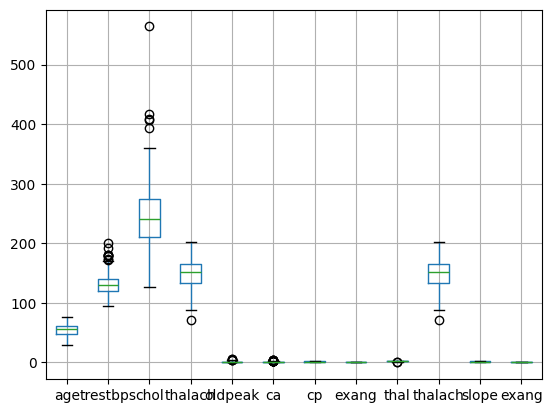

In [11]:
df_cleaned[["age", "trestbps", "chol", "thalach", "oldpeak","ca","cp","exang","thal","thalach","slope","exang"]].boxplot()
plt.show()

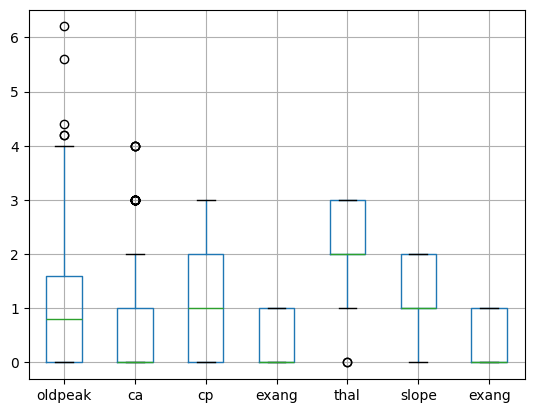

In [12]:
df_cleaned[["oldpeak","ca","cp","exang","thal","slope","exang"]].boxplot()
plt.show()

Menghitung Interquartil Range dan Mengganti Outlier dengan Nan

In [13]:
for x in ['trestbps']:
    q75,q25 = np.percentile(df_cleaned.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_cleaned.loc[df_cleaned[x] < min,x] = np.nan
    df_cleaned.loc[df_cleaned[x] > max,x] = np.nan

for x in ['chol']:
    q75,q25 = np.percentile(df_cleaned.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_cleaned.loc[df_cleaned[x] < min,x] = np.nan
    df_cleaned.loc[df_cleaned[x] > max,x] = np.nan

for x in ['thalach']:
    q75,q25 = np.percentile(df_cleaned.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_cleaned.loc[df_cleaned[x] < min,x] = np.nan
    df_cleaned.loc[df_cleaned[x] > max,x] = np.nan

for x in ['oldpeak']:
    q75,q25 = np.percentile(df_cleaned.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_cleaned.loc[df_cleaned[x] < min,x] = np.nan
    df_cleaned.loc[df_cleaned[x] > max,x] = np.nan

for x in ['thal']:
    q75,q25 = np.percentile(df_cleaned.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_cleaned.loc[df_cleaned[x] < min,x] = np.nan
    df_cleaned.loc[df_cleaned[x] > max,x] = np.nan

Mengganti Outlier (>3.0) dengan NaN

In [14]:
df_cleaned.loc[df_cleaned["ca"] > 3.0, "ca"] = np.nan

Melihat Data Null

In [15]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,9
chol,5
fbs,0
restecg,0
thalach,1
exang,0
oldpeak,5


Menghapus Data Null

In [16]:
df_nooutlier = df_cleaned.dropna(axis=0)

Melihat Data Setelah Menghapus Data Null

In [17]:
df_nooutlier.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Melihat Distribusi Data

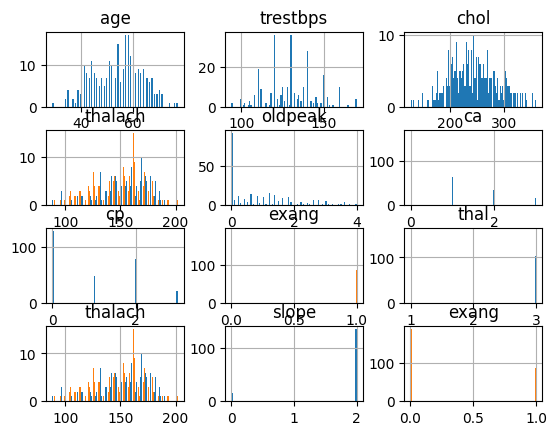

In [19]:
df_nooutlier[["age", "trestbps", "chol", "thalach", "oldpeak","ca","cp","exang","thal","thalach","slope","exang"]].hist(bins=100)
plt.show()

Uji-t untuk Data Numerik

In [21]:
from scipy.stats import ttest_ind, chi2_contingency

numerical_vars = ["age", "trestbps","chol","thalach","oldpeak"]
for var in numerical_vars:
    group_0 = df_nooutlier[df_nooutlier['target'] == 0][var]
    group_1 = df_nooutlier[df_nooutlier['target'] == 1][var]
    t_stat, p_value = ttest_ind(group_0, group_1)
    print(f"Uji-t untuk {var}: t-stat = {t_stat:.5f}, p-value = {p_value:.5f}")

Uji-t untuk age: t-stat = 3.86688, p-value = 0.00014
Uji-t untuk trestbps: t-stat = 1.98501, p-value = 0.04814
Uji-t untuk chol: t-stat = 1.67892, p-value = 0.09430
Uji-t untuk thalach: t-stat = -7.89543, p-value = 0.00000
Uji-t untuk oldpeak: t-stat = 7.98546, p-value = 0.00000


Uji Chi-square untuk Variabel Kategorikal

ca
0.0    0.588448
1.0    0.227437
2.0    0.126354
3.0    0.057762
Name: proportion, dtype: float64


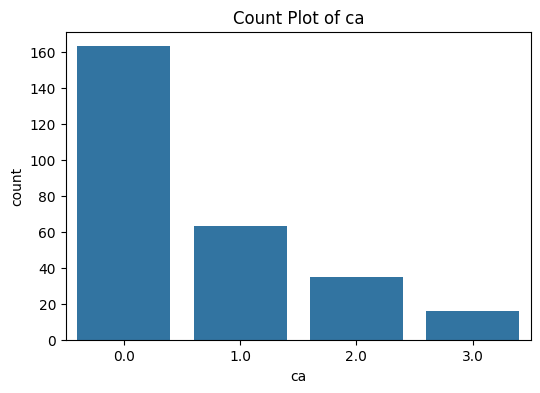

cp
0    0.462094
2    0.285199
1    0.173285
3    0.079422
Name: proportion, dtype: float64


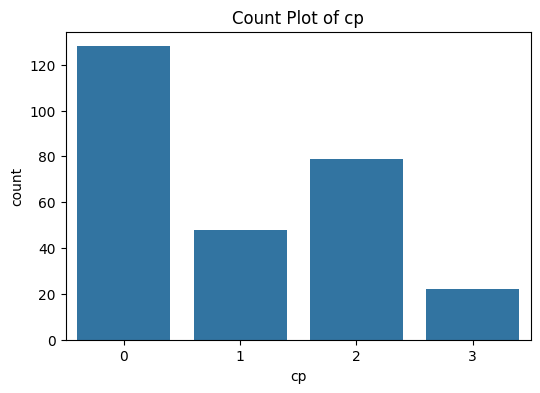

exang
0    0.68231
1    0.31769
Name: proportion, dtype: float64


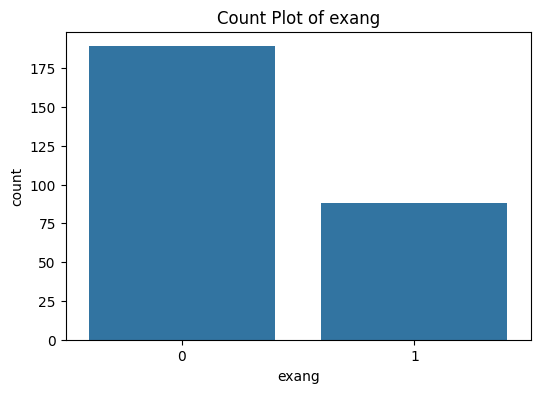

thal
2.0    0.566787
3.0    0.371841
1.0    0.061372
Name: proportion, dtype: float64


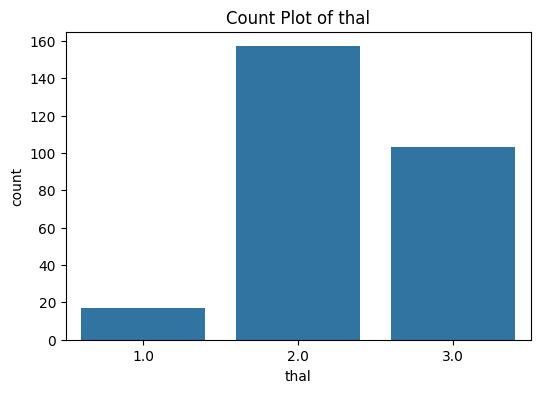

slope
2    0.483755
1    0.458484
0    0.057762
Name: proportion, dtype: float64


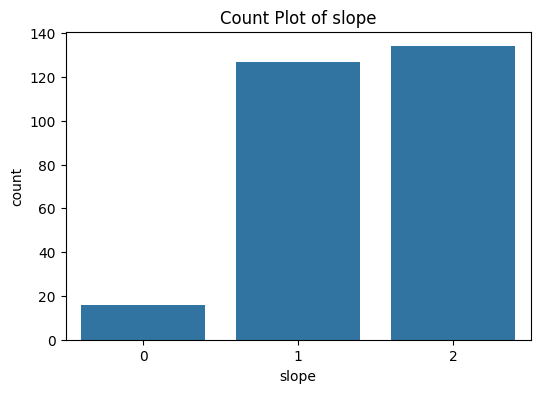

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ["ca","cp", "exang","thal", "slope"]

for var in categorical_vars:
    print(df_nooutlier[var].value_counts(normalize=True))

    plt.figure(figsize=(6, 4))
    sns.countplot(x=df_nooutlier[var])
    plt.title(f'Count Plot of {var}')
    plt.show()

Melihat Korelasi Data dengan Visualisasi Heatmap

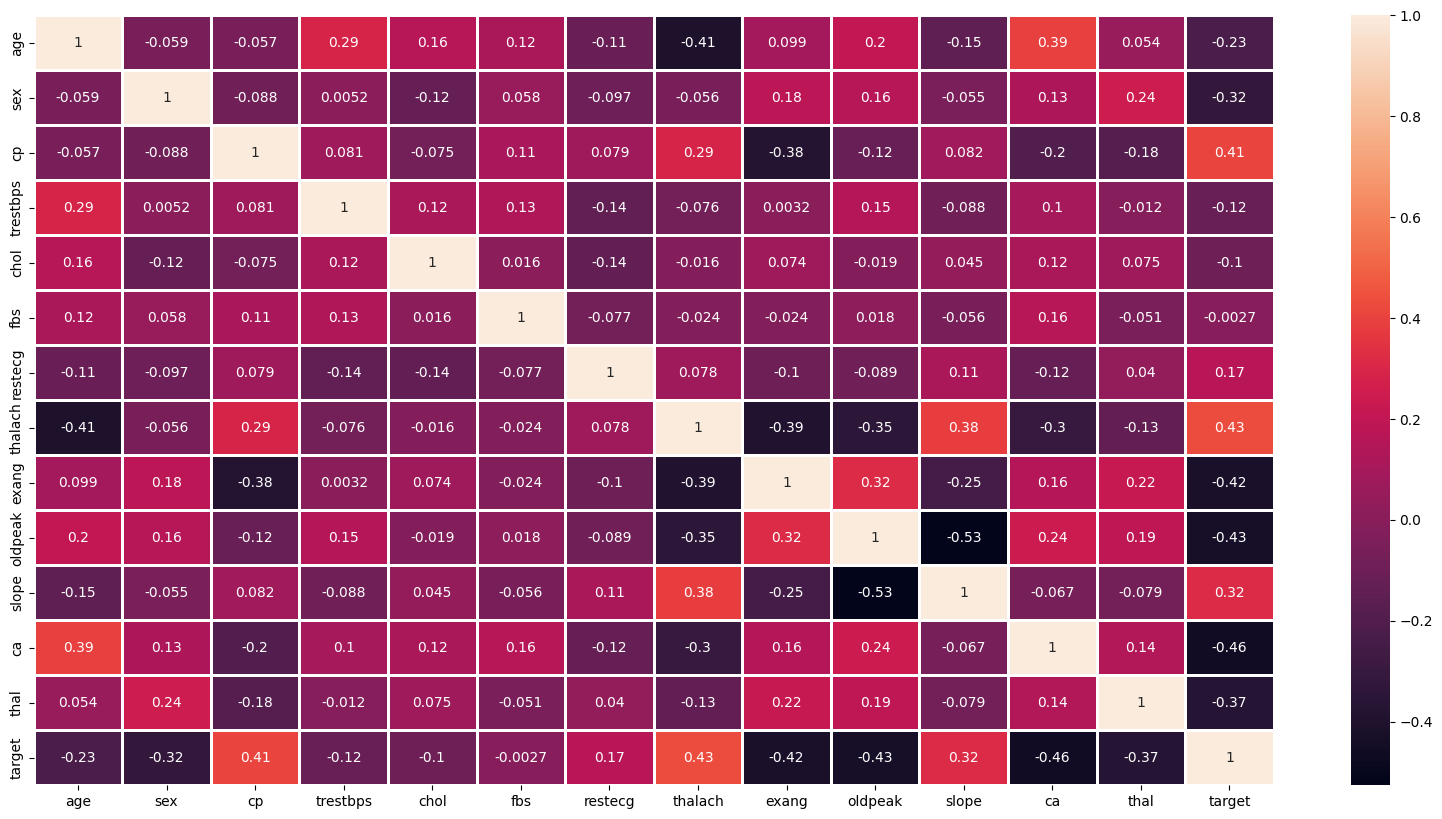

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df_nooutlier.corr(), annot=True, linewidths=1, linecolor="white")
plt.show()

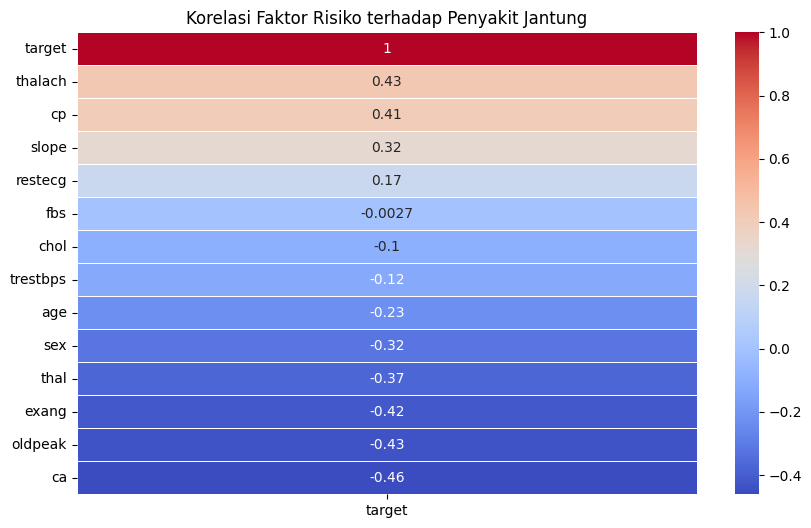

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_nooutlier.corr()[['target']].sort_values(by='target', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi Faktor Risiko terhadap Penyakit Jantung")
plt.show()

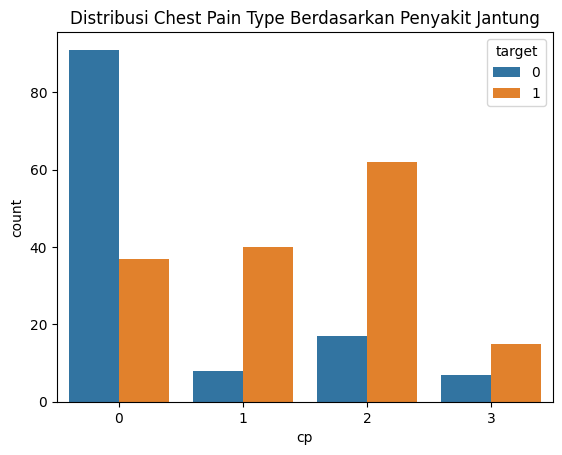

In [25]:
sns.countplot(x='cp', hue='target', data=df_nooutlier)
plt.title("Distribusi Chest Pain Type Berdasarkan Penyakit Jantung")
plt.show()

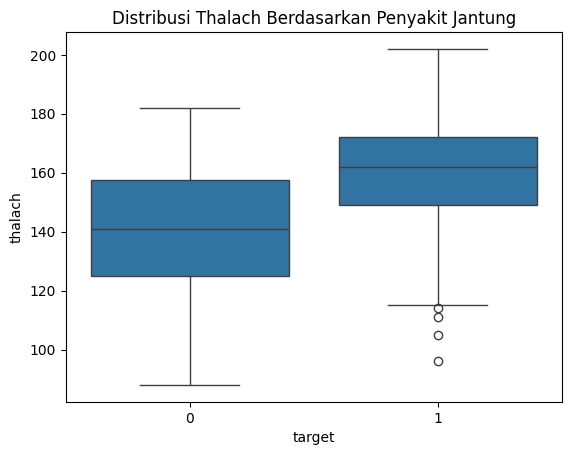

In [26]:
sns.boxplot(x='target', y='thalach', data=df_nooutlier)
plt.title("Distribusi Thalach Berdasarkan Penyakit Jantung")
plt.show()

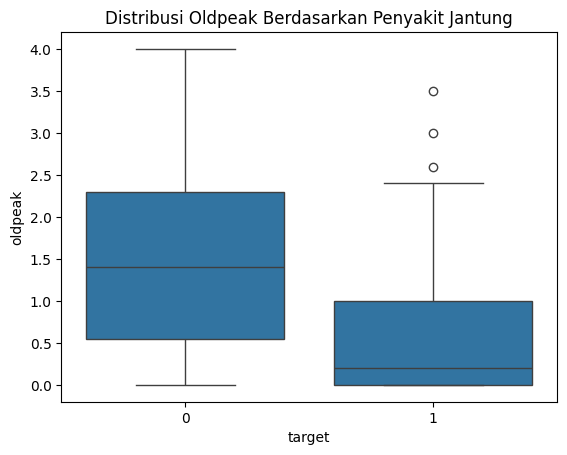

In [27]:
sns.boxplot(x='target', y='oldpeak', data=df_nooutlier)
plt.title("Distribusi Oldpeak Berdasarkan Penyakit Jantung")
plt.show()

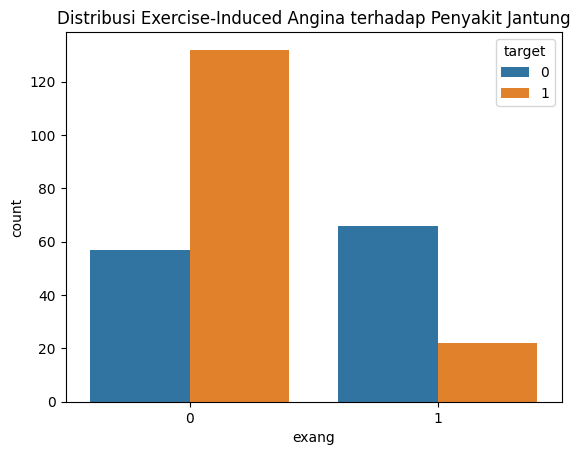

In [28]:
sns.countplot(x='exang', hue='target', data=df_nooutlier)
plt.title("Distribusi Exercise-Induced Angina terhadap Penyakit Jantung")
plt.show()

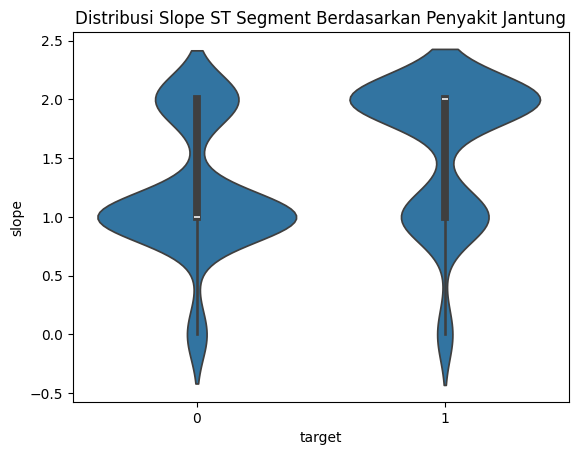

In [29]:
sns.violinplot(x='target', y='slope', data=df_nooutlier)
plt.title("Distribusi Slope ST Segment Berdasarkan Penyakit Jantung")
plt.show()